In [1]:
%matplotlib inline

In [2]:
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

from data import get_data_loader
from model import Net
from train import train, eval

In [3]:
trainloader, testloader, classes = get_data_loader()

Files already downloaded and verified
Files already downloaded and verified


plane   dog  deer  deer truck   cat truck truck   cat   cat plane horse plane   dog   dog  deer   car   car  frog   car  frog   dog  ship   cat   car  frog  deer  bird  deer  bird   cat horse   car   cat   cat  ship horse plane plane plane truck plane  frog horse  ship  deer  bird plane   cat   dog  bird truck   dog   cat  deer   dog   dog  frog horse  frog  ship  deer plane truck


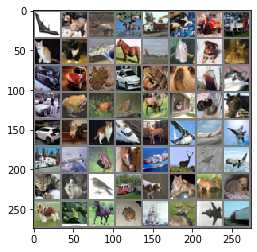

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(len(images))))

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
net = Net().to(device)
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
       BatchNorm2d-2           [-1, 16, 30, 30]              32
              ReLU-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 30, 30]           4,608
       BatchNorm2d-5           [-1, 32, 30, 30]              64
              ReLU-6           [-1, 32, 30, 30]               0
         MaxPool2d-7           [-1, 32, 15, 15]               0
            Conv2d-8           [-1, 16, 15, 15]             512
       BatchNorm2d-9           [-1, 16, 15, 15]              32
             ReLU-10           [-1, 16, 15, 15]               0
           Conv2d-11           [-1, 32, 13, 13]           4,608
      BatchNorm2d-12           [-1, 32, 13, 13]              64
             ReLU-13           [-1, 32, 13, 13]               0
           Conv2d-14           [-1, 64,

In [6]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,train_losses, train_acc)
    eval(model, device, testloader, test_losses, test_acc)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.1430604457855225 Batch_id=781 Accuracy=42.80: 100%|██████████| 782/782 [00:05<00:00, 134.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2806, Accuracy: 5388/10000 (53.88%)

EPOCH: 1


Loss=1.5604926347732544 Batch_id=781 Accuracy=58.39: 100%|██████████| 782/782 [00:05<00:00, 133.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1047, Accuracy: 6096/10000 (60.96%)

EPOCH: 2


Loss=1.2107799053192139 Batch_id=781 Accuracy=65.42: 100%|██████████| 782/782 [00:05<00:00, 133.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9755, Accuracy: 6586/10000 (65.86%)

EPOCH: 3


Loss=1.219565749168396 Batch_id=781 Accuracy=69.82: 100%|██████████| 782/782 [00:05<00:00, 134.28it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9001, Accuracy: 6871/10000 (68.71%)

EPOCH: 4


Loss=1.758928656578064 Batch_id=781 Accuracy=72.59: 100%|██████████| 782/782 [00:05<00:00, 133.40it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8208, Accuracy: 7096/10000 (70.96%)

EPOCH: 5


Loss=1.0694857835769653 Batch_id=781 Accuracy=74.94: 100%|██████████| 782/782 [00:05<00:00, 132.18it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7583, Accuracy: 7375/10000 (73.75%)

EPOCH: 6


Loss=0.5622358918190002 Batch_id=781 Accuracy=76.86: 100%|██████████| 782/782 [00:05<00:00, 132.45it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7371, Accuracy: 7441/10000 (74.41%)

EPOCH: 7


Loss=1.5036959648132324 Batch_id=781 Accuracy=78.20: 100%|██████████| 782/782 [00:05<00:00, 130.52it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7320, Accuracy: 7474/10000 (74.74%)

EPOCH: 8


Loss=0.9590477347373962 Batch_id=781 Accuracy=79.43: 100%|██████████| 782/782 [00:05<00:00, 131.98it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7649, Accuracy: 7458/10000 (74.58%)

EPOCH: 9


Loss=0.38977867364883423 Batch_id=781 Accuracy=80.48: 100%|██████████| 782/782 [00:05<00:00, 133.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7241, Accuracy: 7533/10000 (75.33%)

EPOCH: 10


Loss=0.4412926137447357 Batch_id=781 Accuracy=81.26: 100%|██████████| 782/782 [00:05<00:00, 133.20it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6742, Accuracy: 7638/10000 (76.38%)

EPOCH: 11


Loss=1.327734112739563 Batch_id=781 Accuracy=82.27: 100%|██████████| 782/782 [00:05<00:00, 132.08it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7154, Accuracy: 7576/10000 (75.76%)

EPOCH: 12


Loss=0.5259677171707153 Batch_id=781 Accuracy=83.20: 100%|██████████| 782/782 [00:05<00:00, 133.58it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7055, Accuracy: 7620/10000 (76.20%)

EPOCH: 13


Loss=0.43365827202796936 Batch_id=781 Accuracy=83.79: 100%|██████████| 782/782 [00:05<00:00, 132.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7162, Accuracy: 7590/10000 (75.90%)

EPOCH: 14


Loss=1.5094265937805176 Batch_id=781 Accuracy=84.67: 100%|██████████| 782/782 [00:05<00:00, 132.03it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7332, Accuracy: 7590/10000 (75.90%)

EPOCH: 15


Loss=0.9687011241912842 Batch_id=781 Accuracy=84.87: 100%|██████████| 782/782 [00:05<00:00, 133.22it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7014, Accuracy: 7661/10000 (76.61%)

EPOCH: 16


Loss=0.2728336453437805 Batch_id=781 Accuracy=85.82: 100%|██████████| 782/782 [00:05<00:00, 131.37it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7312, Accuracy: 7653/10000 (76.53%)

EPOCH: 17


Loss=0.18860962986946106 Batch_id=781 Accuracy=86.23: 100%|██████████| 782/782 [00:05<00:00, 131.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7219, Accuracy: 7656/10000 (76.56%)

EPOCH: 18


Loss=0.72862708568573 Batch_id=781 Accuracy=86.56: 100%|██████████| 782/782 [00:05<00:00, 132.16it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7654, Accuracy: 7610/10000 (76.10%)

EPOCH: 19


Loss=0.5690372586250305 Batch_id=781 Accuracy=86.99: 100%|██████████| 782/782 [00:05<00:00, 132.09it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7518, Accuracy: 7613/10000 (76.13%)

EPOCH: 20


Loss=0.49541282653808594 Batch_id=781 Accuracy=87.43: 100%|██████████| 782/782 [00:05<00:00, 134.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7566, Accuracy: 7664/10000 (76.64%)

EPOCH: 21


Loss=0.49070489406585693 Batch_id=781 Accuracy=88.11: 100%|██████████| 782/782 [00:05<00:00, 131.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7446, Accuracy: 7710/10000 (77.10%)

EPOCH: 22


Loss=0.4238411486148834 Batch_id=781 Accuracy=88.27: 100%|██████████| 782/782 [00:05<00:00, 132.11it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7334, Accuracy: 7687/10000 (76.87%)

EPOCH: 23


Loss=0.707552969455719 Batch_id=781 Accuracy=88.45: 100%|██████████| 782/782 [00:05<00:00, 131.88it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7665, Accuracy: 7630/10000 (76.30%)

EPOCH: 24


Loss=0.38270288705825806 Batch_id=781 Accuracy=88.92: 100%|██████████| 782/782 [00:06<00:00, 130.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7642, Accuracy: 7684/10000 (76.84%)

EPOCH: 25


Loss=0.2675092816352844 Batch_id=781 Accuracy=89.41: 100%|██████████| 782/782 [00:05<00:00, 132.27it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7995, Accuracy: 7665/10000 (76.65%)

EPOCH: 26


Loss=0.4521210193634033 Batch_id=781 Accuracy=89.83: 100%|██████████| 782/782 [00:05<00:00, 131.47it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7883, Accuracy: 7698/10000 (76.98%)

EPOCH: 27


Loss=0.24937431514263153 Batch_id=781 Accuracy=89.94: 100%|██████████| 782/782 [00:05<00:00, 133.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8084, Accuracy: 7613/10000 (76.13%)

EPOCH: 28


Loss=0.2744540274143219 Batch_id=781 Accuracy=90.17: 100%|██████████| 782/782 [00:05<00:00, 131.50it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8180, Accuracy: 7639/10000 (76.39%)

EPOCH: 29


Loss=0.5975791215896606 Batch_id=781 Accuracy=90.85: 100%|██████████| 782/782 [00:05<00:00, 132.65it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8279, Accuracy: 7640/10000 (76.40%)

EPOCH: 30


Loss=0.47720080614089966 Batch_id=781 Accuracy=90.66: 100%|██████████| 782/782 [00:05<00:00, 130.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8948, Accuracy: 7462/10000 (74.62%)

EPOCH: 31


Loss=0.4892085790634155 Batch_id=781 Accuracy=90.89: 100%|██████████| 782/782 [00:05<00:00, 132.88it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8464, Accuracy: 7682/10000 (76.82%)

EPOCH: 32


Loss=0.25152698159217834 Batch_id=781 Accuracy=91.22: 100%|██████████| 782/782 [00:05<00:00, 131.07it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8626, Accuracy: 7568/10000 (75.68%)

EPOCH: 33


Loss=0.7736697196960449 Batch_id=781 Accuracy=91.78: 100%|██████████| 782/782 [00:06<00:00, 129.27it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8581, Accuracy: 7651/10000 (76.51%)

EPOCH: 34


Loss=0.16761597990989685 Batch_id=781 Accuracy=91.63: 100%|██████████| 782/782 [00:05<00:00, 132.12it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8457, Accuracy: 7700/10000 (77.00%)

EPOCH: 35


Loss=0.3832361102104187 Batch_id=781 Accuracy=92.03: 100%|██████████| 782/782 [00:05<00:00, 131.33it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8768, Accuracy: 7698/10000 (76.98%)

EPOCH: 36


Loss=0.5511016249656677 Batch_id=781 Accuracy=92.16: 100%|██████████| 782/782 [00:05<00:00, 130.77it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8768, Accuracy: 7681/10000 (76.81%)

EPOCH: 37


Loss=0.05669510364532471 Batch_id=781 Accuracy=92.48: 100%|██████████| 782/782 [00:05<00:00, 128.31it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8973, Accuracy: 7608/10000 (76.08%)

EPOCH: 38


Loss=0.6582413911819458 Batch_id=781 Accuracy=92.59: 100%|██████████| 782/782 [00:05<00:00, 131.87it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9248, Accuracy: 7610/10000 (76.10%)

EPOCH: 39


Loss=0.6799514889717102 Batch_id=781 Accuracy=92.82: 100%|██████████| 782/782 [00:05<00:00, 131.02it/s]  



Test set: Average loss: 0.9278, Accuracy: 7680/10000 (76.80%)



Text(0.5, 1.0, 'Test Accuracy')

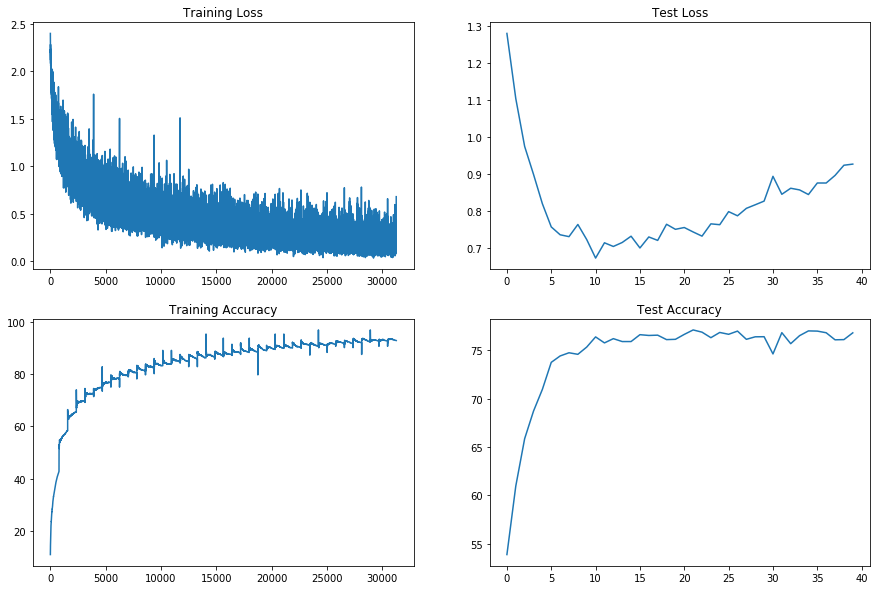

In [12]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog


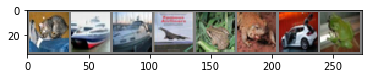

In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [16]:
outputs = model(images.to(device))

In [17]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

Predicted:    cat  ship  ship plane  frog  frog   car  frog


In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 76 %


In [20]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 82 %
Accuracy of   car : 91 %
Accuracy of  bird : 66 %
Accuracy of   cat : 54 %
Accuracy of  deer : 67 %
Accuracy of   dog : 69 %
Accuracy of  frog : 81 %
Accuracy of horse : 78 %
Accuracy of  ship : 86 %
Accuracy of truck : 88 %
